X1 (100, 1)
Y1 (100,)


<ipython-input-1-ba23f7a83cf7>:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter([[X1.mean()]], [[Y1.mean()]], marker="x", s=25, edgecolor="k")


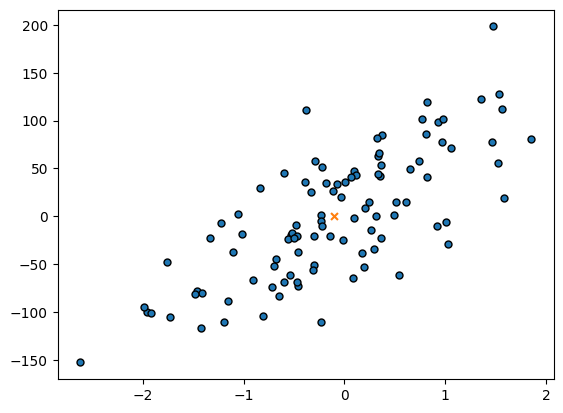

In [1]:
from sklearn.datasets import make_regression, make_classification, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.fixes import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

X1, Y1 = make_regression(
    n_samples=100,n_features=1, n_informative=1,noise=50,random_state=42
)
# X1+=200
print("X1", X1.shape)
print("Y1", Y1.shape)

pcg=0.20
pcg_count=int(X1.shape[0]*pcg)

train_x=X1[:-pcg_count]
test_x=X1[-pcg_count:]

train_y=Y1[:-pcg_count]
test_y=Y1[-pcg_count:]

plt.scatter(X1[:], Y1[:], marker="o", s=25, edgecolor="k")

# plt.scatter([[0]], [[Y1.mean()]], marker="o", s=25, edgecolor="k")
plt.scatter([[X1.mean()]], [[Y1.mean()]], marker="x", s=25, edgecolor="k")

In [8]:
w=0
for i,sample in enumerate(zip(train_x.ravel(),train_y)):
    # This just approximates the mean of the dataset given a w that fits the tendency line
    grad=sample[1]-w
    w=w+(1/(i+1))*grad
print("estimated mean", w)

estimated mean 2.2172852721732705


In [9]:
# From estimated mean from the previous cell
print("std y", train_y.std(), "var y", train_y.var())
print("mean y", train_y.mean())
print("estimated mean", w)
s=0
for i,sample in enumerate(zip(train_x.ravel(),train_y)):
    # This just approximates the var of the dataset given a w that fits the tendency line
  grad=(sample[1]-w)**2-s
  s=s+(1/(i+1))*grad
print("estimated variance", s, "estimated std_dev", np.math.sqrt(s))

std y 68.31930006138688 var y 4667.526760877818
mean y 2.21728527217327
estimated mean 2.2172852721732705
estimated variance 4667.526760877818 estimated std_dev 68.31930006138688


(80,)


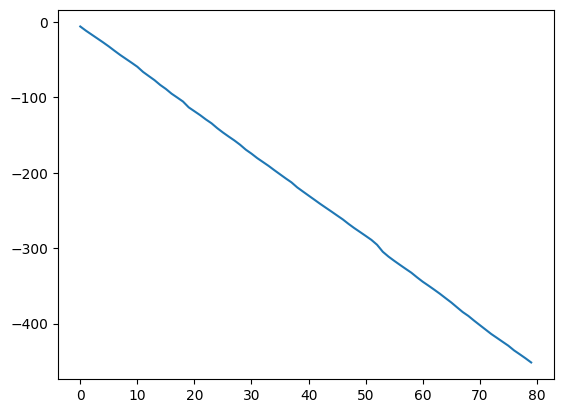

In [26]:
from scipy.stats import norm
print(train_y.shape)
# w=0
likelihoods=[]

cur_dist=norm(w,np.math.sqrt(s))
ln_likelihood=0
for i,sample in enumerate(zip(train_x.ravel(),train_y)):
  ln_likelihood+=np.log(cur_dist.pdf(sample[1]))
  likelihoods.append([i,ln_likelihood])

likelihoods=np.array(likelihoods)

plt.plot(likelihoods[:,0],likelihoods[:,1])